# Atividade 2.2 - Linear Regression, p-value and Metrics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
rng = np.random.default_rng(42)

## Letra A

Usaremos o intervalo $[0, 5]$.

In [3]:
interval = (0, 5)

Geramos 9 valores para $x$ dentro do intervalo escolhido e então calcularemos os valores de $y$ de acordo com a reta $y = 2.5x$.

In [ ]:
x = rng.uniform(*interval, 9)
y = 2.5 * x

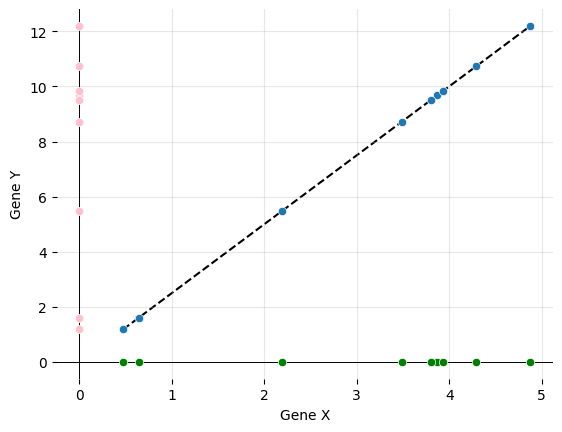

In [ ]:
sns.scatterplot(x=x, y=y)
sns.scatterplot(x=x, y=0, color="green", zorder=4)
sns.scatterplot(x=0, y=y, color="pink", zorder=4)
sns.lineplot(x=x, y=y, color="black", linestyle="--", zorder=0)
plt.axhline(0, color="black", lw=0.7, zorder=3)
plt.axvline(0, color="black", lw=0.7, zorder=3)
sns.despine(left=True, bottom=True)
plt.grid(alpha=0.3)
plt.xlabel("Gene X")
plt.ylabel("Gene Y")
plt.show()

Agora geramos 9 valores aleatórios de uma distribuição uniforme dentro do intervalo escolhido e tentamos ajustar uma reta a esses dados usando a regressão linear.

In [ ]:
x = rng.uniform(*interval, 9)
y = rng.uniform(*interval, 9)

lr = st.linregress(x, y)

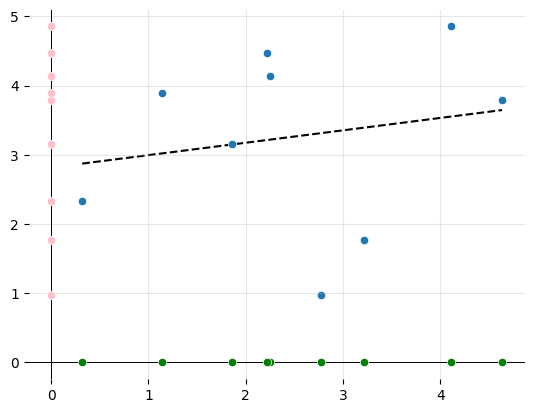

p-value: 0.6305765797944562
Matriz de Covariância:
[[1.86559182 0.33433272]
 [0.33433272 1.71933538]]


In [ ]:
sns.scatterplot(x=x, y=y)
sns.scatterplot(x=x, y=0, color="green", zorder=4)
sns.scatterplot(x=0, y=y, color="pink", zorder=4)
sns.lineplot(
    x=x,
    y=lr.slope * x + lr.intercept,
    color="black",
    linestyle="--",
    zorder=0,
)
plt.axhline(0, color="black", lw=0.7, zorder=3)
plt.axvline(0, color="black", lw=0.7, zorder=3)
sns.despine(left=True, bottom=True)
plt.grid(alpha=0.3)
plt.show()

print(f"p-value: {lr.pvalue}")
print(f"Matriz de Covariância:\n{np.cov(x, y)}")

Considerando um nível de confiança de 95%, o **_p-value_** muito superior a 5% indica que a regressão linear não apresentou significância estatística para os dados gerados. Além disso, a matriz de covariância mostrou uma covariância baixa entre as variáveis, indicando que não há relação forte entre elas. Isso é esperado, uma vez que os dados foram gerados de forma aleatória usando uma distribuição uniforme.

## Letra B

O *dataset* usado foi extraído do [Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams) e reúne dados sobre o desempenho de estudantes em provas de escrita, matemática e leitura. Nele há características como gênero, etnia, nível de escolaridade dos pais, tipo de alimentação e se o aluno realizou ou não um curso preparatório para as provas.

In [6]:
df = pd.read_csv("../data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Para o exercício, iremos usar apenas as notas na prova de matemática.

In [7]:
df_math_score = df["math score"]
df_math_score.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

Criamos uma função para calcular métricas como a **média**, **desvio padrão**, **erro padrão**, **graus de liberdade** e o **intervalo de confiança** (usando o teste t de Student).

In [8]:
def compute_metrics(
    data: pd.Series,
    confidence: float,
) -> tuple[tuple[float, float], float, float, float, int]:
    mean = data.mean()
    std = data.std()
    se = std / np.sqrt(len(data))
    dof = len(data) - 1

    ci = st.t.interval(
        confidence=confidence,
        df=dof,
        loc=mean,
        scale=se,
    )

    return ci, mean, std, se, dof

In [9]:
def plot_confidence_interval(
        ci: tuple[float, float],
        mean: float,
        se: float,
        dof: int,
        confidence: float,
        x_label: str,
    ) -> None:
    x = np.linspace(mean - 4*se, mean + 4*se, 1000)
    y = st.t.pdf(x, df=dof, loc=mean, scale=se)
    plt.plot(x, y, color="red")

    plt.fill_between(
        x,
        y,
        where=(x >= ci[0]) & (x <= ci[1]),
        alpha=0.4,
        color="grey",
    )

    plt.axvline(mean, linestyle="--", color="black", lw=0.8)
    plt.axvline(ci[0], linestyle="--", color="black", lw=0.8)
    plt.axvline(ci[1], linestyle="--", color="black", lw=0.8)
    plt.axhline(0, color="black", lw=1)

    plt.title(f"Distribuição de Probabilidade da Média ({confidence * 100}%)")
    plt.xlabel(x_label)
    plt.xticks([ci[0], mean, ci[1]])

    sns.despine(left=True, bottom=True)
    plt.yticks([])

    plt.show()

Para cada nível de confiança, iremos calcular as métricas dos dados e exibir o intervalo de confiança na distribuição de probabilidade da média.

Nível de Confiança: 90.0%
Média: 66.089
Desvio Padrão: 15.16308009600945
Intervalo de Confiança: [65.3, 66.88]


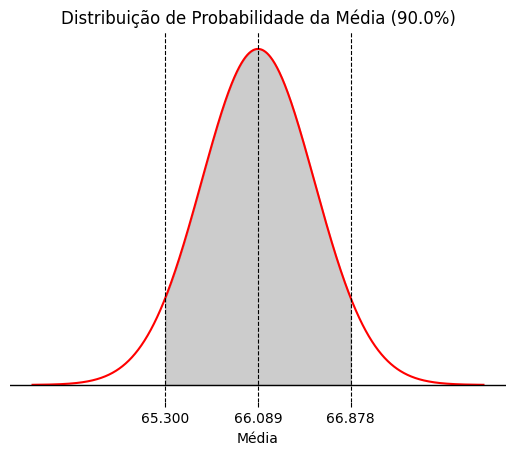

Nível de Confiança: 95.0%
Média: 66.089
Desvio Padrão: 15.16308009600945
Intervalo de Confiança: [65.15, 67.03]


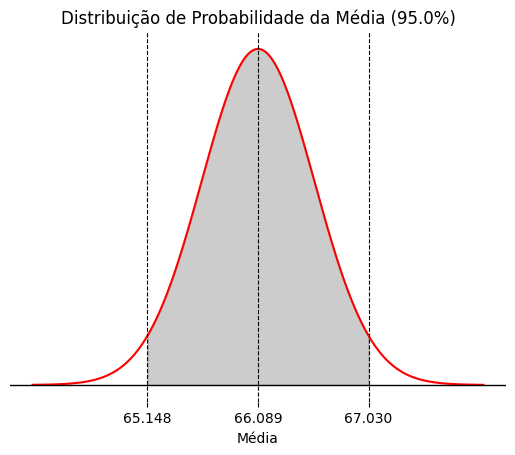

Nível de Confiança: 99.0%
Média: 66.089
Desvio Padrão: 15.16308009600945
Intervalo de Confiança: [64.85, 67.33]


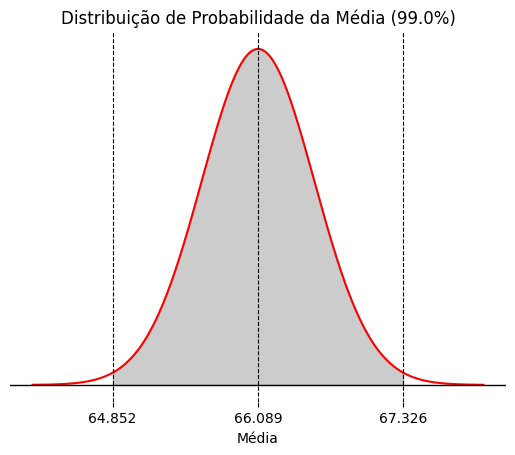

In [10]:
for confidence in [0.9, 0.95, 0.99]:
    ci, mean, std, se, dof = compute_metrics(df_math_score, confidence)

    print(f"Nível de Confiança: {confidence * 100}%")
    print(f"Média: {mean}")
    print(f"Desvio Padrão: {std}")
    print(f"Intervalo de Confiança: {[float(round(i, 2)) for i in ci]}")

    plot_confidence_interval(ci, mean, se, dof, confidence, "Média")


## Letra C

Usaremos o mesmo *dataset* da letra B.

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Calcularemos a média das três provas para cada aluno e, em seguida, separaremos o dataset em dois grupos: estudantes que não realizaram o curso preparatório (grupo de controle) e estudantes que o realizaram (grupo de teste).

In [12]:
df["mean_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)
df_course_completed = df[df["test preparation course"] == "completed"]["mean_score"]
df_course_none = df[df["test preparation course"] == "none"]["mean_score"]

A hipótese nula ($H_0$​) é que a média das notas dos dois grupos é igual.

In [13]:
test_t, p_value = st.ttest_ind(
    df_course_completed,
    df_course_none,
)

print(f"p-value: {p_value}")

p-value: 1.6337802035923472e-16


Assumindo um nível de confiança de 95%, o **_p-value_** extremamente baixo (menor que 5%) indica que a probabilidade de a diferença entre as médias ter ocorrido por acaso é muito pequena. Portanto, podemos rejeitar a hipótese nula e concluir que há uma diferença estatisticamente significativa entre o desempenho de quem fez o curso preparatório e de quem não fez.

## Letra D

https://docs.google.com/presentation/d/13duvdeDIQ8AkNYR1o1TawKF88K2a-kxIcr6ts1_S7n0/edit?usp=sharing

## Letra E

Como o vídeo não apresentou o dataset utilizado para os cálculos, iremos gerar um conjunto de dados sintético a partir de uma distribuição normal com média 75,9, desvio padrão 25 e 50 amostras.

In [ ]:
dataset = rng.normal(loc=75.9, scale=25, size=50)
n = len(dataset)
confidence = 0.95

Calculamos a média e o desvio padrão dos dados gerados, junto com o valor crítico da distribuição t de Student para 95% de confiança com $n - 1$ graus de liberdade. Com esses valores, obtemos o limite inferior e superior do intervalo de confiança.

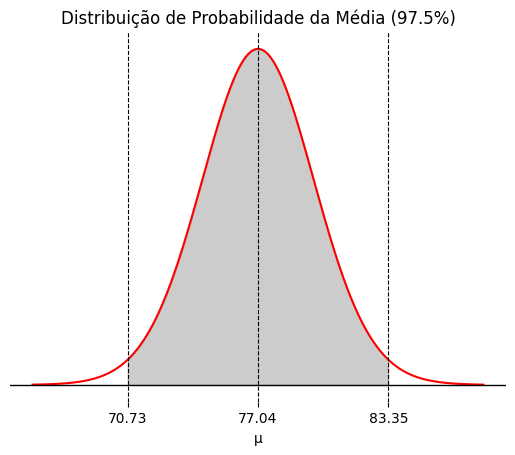

In [ ]:
s = np.std(dataset)
overline_x = np.mean(dataset)
t = st.t.ppf((1 + confidence) / 2, df=(n - 1))

lower = overline_x - t * (s / np.sqrt(n))
upper = overline_x + t * (s / np.sqrt(n))

ci = (lower, upper)

plot_confidence_interval(ci, overline_x, s / np.sqrt(n), n - 1, confidence, "μ")

Considerando que alta taxa de batimentos cardíacos corresponde a valores maiores ou iguais a 100 bpm, calculamos a proporção de observações com taxa elevada junto com o valor crítico da distribuição normal padrão para 95% de confiança. Com esses valores, obtemos o limite inferior e superior do intervalo de confiança.

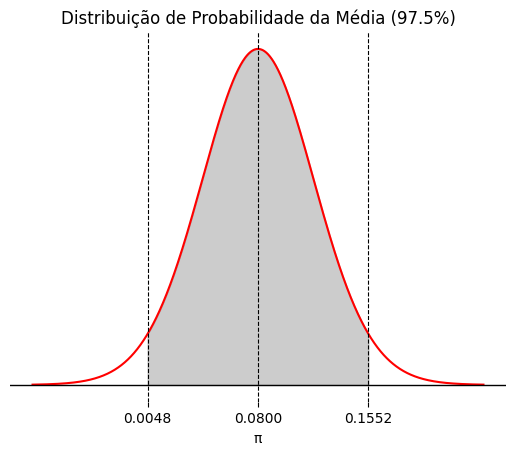

In [16]:
high_heart_rate = 100

p = len(dataset[dataset >= high_heart_rate]) / n
z = st.norm.ppf(confidence)

lower = p - z * np.sqrt((p * (1 - p)) / n)
upper = p + z * np.sqrt((p * (1 - p)) / n)

ci = (lower, upper)

plot_confidence_interval(ci, p, np.sqrt((p * (1 - p)) / n), n - 1, confidence, "π")

## Letra F

Geraremos 9 valores aleatórios no intervalo $[0, 6]$ a partir de uma distribuição uniforme. Em seguida, calcularemos os valores de $y$ seguindo a reta $y = 0.1 + 0.78x$ ao longo de um *grid* de pontos. Além disso, calcularemos valores de $y$ com ruído de média 0 e desvio padrão 1 aplicados aos 9 pontos gerados.

In [ ]:
x = rng.uniform(0, 6, 9)
x_grid = np.linspace(0, 6, 100)
y = 0.1 + 0.78 * x_grid
y_noise = 0.1 + 0.78 * x + rng.normal(0, 1, x.shape)

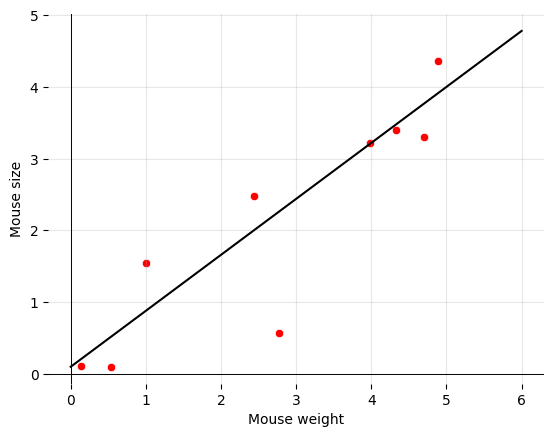

In [ ]:
sns.lineplot(x=x_grid, y=y, color="black")
sns.scatterplot(x=x, y=y_noise, color="red")
plt.axhline(0, color="black", lw=0.7, zorder=3)
plt.axvline(0, color="black", lw=0.7, zorder=3)
sns.despine(left=True, bottom=True)
plt.grid(alpha=0.3)
plt.xlabel("Mouse weight")
plt.ylabel("Mouse size")
plt.show()

Agora, ajustamos uma reta aos pontos gerados usando regressão linear. A partir do resultado, fixamos o valor do *intercept* e variamos o *slope* para obter 6 valores diferentes, igualmente espaçados entre $-2a$ e $2a$ (onde $a$ é o *slope* original). Para cada reta com slope diferente, calculamos o $R^2$ e a soma dos quadrados dos resíduos.

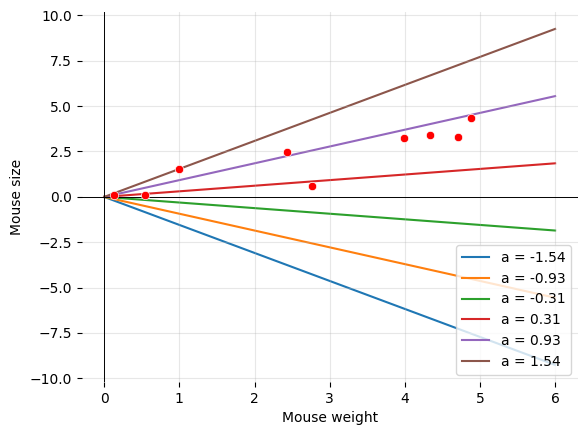

In [18]:
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y_noise)

sns.scatterplot(x=x, y=y_noise, color="red", zorder=4)

ssr_list = []
a_list = []
r2_list = []

for a in np.linspace(-2 * lr.coef_, 2 * lr.coef_, 6):
    sst = sum((y_noise - np.mean(y_noise)) ** 2)
    ssr = sum((y_noise - (lr.intercept_ + a * x)) ** 2)
    ssreg = sum(((lr.intercept_ + a * x) - np.mean(y_noise)) ** 2)
    r2 = 1 - (ssr / sst)

    a_list.append(a[0])
    ssr_list.append(ssr)
    r2_list.append(r2)

    sns.lineplot(
        x=x_grid,
        y=lr.intercept_ + a * x_grid,
        zorder=0,
        label=f"a = {a[0]:.2f}",
    )

plt.axhline(0, color="black", lw=0.7, zorder=3)
plt.axvline(0, color="black", lw=0.7, zorder=3)
sns.despine(left=True, bottom=True)
plt.grid(alpha=0.3)
plt.xlabel("Mouse weight")
plt.ylabel("Mouse size")
plt.legend(loc="lower right")
plt.show()

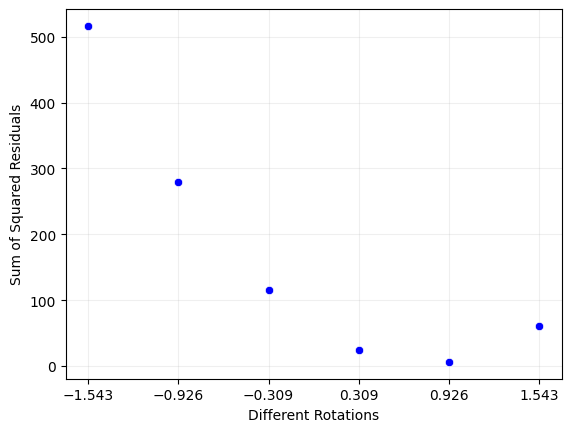

In [19]:
sns.scatterplot(x=a_list, y=ssr_list, color="blue", zorder=3)
plt.xticks(np.array(a_list))
plt.grid(alpha=0.2)
plt.xlabel("Different Rotations")
plt.ylabel("Sum of Squared Residuals")
plt.show()

In [20]:
for a, r2 in zip(a_list, r2_list, strict=True):
    print(f"a: {a:.2f}, R^2: {r2:.4f}")

sklearn_r2 = lr.score(x.reshape(-1, 1), y_noise)
print(f"\nSklearn: {lr.coef_[0]:.2f}, R^2: {sklearn_r2:.4f}")

a: -1.54, R^2: -24.5234
a: -0.93, R^2: -12.8170
a: -0.31, R^2: -4.7126
a: 0.31, R^2: -0.2101
a: 0.93, R^2: 0.6904
a: 1.54, R^2: -2.0111

Sklearn: 0.77, R^2: 0.8030


O resultado da regressão linear realizada pelo **scikit-learn** apresenta um $R^2$ melhor do que qualquer uma das variações com diferentes valores para $a$.

In [21]:
X_const = sm.add_constant(x)
model = sm.OLS(y_noise, X_const)
results = model.fit()

print(results.summary())
print(f"\np-value: {results.pvalues[1]}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     28.52
Date:                Thu, 29 Jan 2026   Prob (F-statistic):            0.00107
Time:                        09:13:21   Log-Likelihood:                -9.1060
No. Observations:                   9   AIC:                             22.21
Df Residuals:                       7   BIC:                             22.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0054      0.471     -0.011      0.9

- `R-squared` igual a 0.803 indica que 80,3% da variação em $y$ é explicada por $x$.
- `F-statistic` igual a 28.52 e `Prob (F-statistic)` igual a 0.00107 indica que o modelo é bem melhor do que um que só usa a média.
- `p-value` igual a 0.001, assumindo um nível de confiança de 95%, indica que $x$ influencia $y$ de forma significativa.

## Letra G

In [22]:
def get_lu_matrices(matrix: list[list]) -> tuple[list, list]:
    rows = columns = len(matrix)

    lower = [[0 for _ in range(columns)] for _ in range(rows)]
    upper = [[0 for _ in range(columns)] for _ in range(rows)]

    for i in range(rows):
        for j in range(columns):
            value = matrix[i][j]

            if i >= j:
                lower[i][j] = value

            if j >= i:
                upper[i][j] = value

            if j == i:
                lower[i][j] = 1

    return lower, upper

In [23]:
def show_matrix(matrix: list[list]) -> None:
    for row in matrix:
        print(row)
    print()

In [24]:
a = [[3, -4, 1], [1, 2, 2], [4, 0, -3]]
b = [9, 3, -2]
n = len(a)
c = [0] * n
p = [0] * n
y = [0] * n
x = [0] * n

print("Matriz Inicial:")
show_matrix(a)

for i in range(n):
    p[i] = i

for k in range(n - 1):
    pv = abs(a[k][k])
    r = k
    for i in range(k + 1, n):
        if abs(a[i][k]) > pv:
            pv = abs(a[i][k])
            r = i

    if pv == 0:
        raise ValueError

    if r != k:
        aux = p[k]
        p[k] = p[r]
        p[r] = aux

        for j in range(n):
            aux = a[k][j]
            a[k][j] = a[r][j]
            a[r][j] = aux

    print(f"Após a troca de linhas na iteração {k + 1}:")
    show_matrix(a)

    for i in range(k + 1, n):
        m = a[i][k] / a[k][k]
        a[i][k] = m

        for j in range(k + 1, n):
            a[i][j] = a[i][j] - m * a[k][j]

    print(f"Após a eliminação na iteração {k + 1}:")
    show_matrix(a)

L, U = get_lu_matrices(a)

print("Matriz L:")
show_matrix(L)

print("Matriz U:")
show_matrix(U)

print("Vetor b:")
print(b)
print()

for i in range(n):
    r = p[i]
    c[i] = b[r]

print("Vetor b após permutação:")
print(c)
print()

print("Vetor y após resolver Ly = c:")
for i in range(n):
    soma = 0
    for j in range(i):
        soma += L[i][j] * y[j]
    y[i] = c[i] - soma
print(y)
print()

print("Vetor x após resolver Ux = y:")
for i in range(n - 1, -1, -1):
    soma = 0
    for j in range(i + 1, n):
        soma += U[i][j] * x[j]
    x[i] = (y[i] - soma) / U[i][i]
print(x)
print()

Matriz Inicial:
[3, -4, 1]
[1, 2, 2]
[4, 0, -3]

Após a troca de linhas na iteração 1:
[4, 0, -3]
[1, 2, 2]
[3, -4, 1]

Após a eliminação na iteração 1:
[4, 0, -3]
[0.25, 2.0, 2.75]
[0.75, -4.0, 3.25]

Após a troca de linhas na iteração 2:
[4, 0, -3]
[0.75, -4.0, 3.25]
[0.25, 2.0, 2.75]

Após a eliminação na iteração 2:
[4, 0, -3]
[0.75, -4.0, 3.25]
[0.25, -0.5, 4.375]

Matriz L:
[1, 0, 0]
[0.75, 1, 0]
[0.25, -0.5, 1]

Matriz U:
[4, 0, -3]
[0, -4.0, 3.25]
[0, 0, 4.375]

Vetor b:
[9, 3, -2]

Vetor b após permutação:
[-2, 9, 3]

Vetor y após resolver Ly = c:
[-2, 10.5, 8.75]

Vetor x após resolver Ux = y:
[1.0, -1.0, 2.0]



## Letra H

In [25]:
def line_criterion(a: list) -> tuple[list, float]:
    n = len(a)
    alphak = [0] * n

    for i in range(n):
        for j in range(n):
            if j != i:
                alphak[i] += abs(a[i][j]) / abs(a[i][i])

    return alphak, max(alphak)

In [26]:
def gauss_jacobi(a: list, b: list, epsilon: float, x0: list, max_iter: int) -> list:
    alphak, alpha = line_criterion(a)

    print(f"Critério da linha: {alphak} -> {alpha}")

    if  not (alpha < 1):
        print("O método de Gauss-Seidel pode não convergir.")

    n = len(a)
    xk = x0

    for k in range(max_iter):
        xk1 = xk.copy()
        for i in range(n):
            xk1[i] = round(1 / a[i][i] * (b[i] - sum(
                a[i][j] * xk[j] for j in range(n) if j != i)
            ), 4)

        abs_xk1 = [abs(x) for x in xk1]
        max_abs_xk1 = max(abs_xk1)

        dk = [round(abs(xk1[i] - xk[i]) / max_abs_xk1, 4) for i in range(n)]

        d = max(dk)

        print(f"\nIteração {k + 1}")
        print(f"x_{k}: {xk}")
        print(f"x_{k+1}: {xk1}")
        print(f"d_{k}: {dk}")
        print(f"max_d_{k}: {d}")

        if d < epsilon:
            return k + 1, xk1

        xk = xk1

    return max_iter, xk

In [27]:
a = [[10, 2, 1], [1, 5, 1], [2, 3, 10]]
b = [7, -8, 6]

print("Matriz Inicial:")
show_matrix(a)

print("Vetor b:")
print(b)
print()

x0 = [0.7, -1.6, 0.6]
epsilon = 0.05
max_iter = 10

k, solution = gauss_jacobi(a, b, epsilon, x0, max_iter)
print(f"\nConvergiu em {k} iterações.")
print("Solução:", solution)

Matriz Inicial:
[10, 2, 1]
[1, 5, 1]
[2, 3, 10]

Vetor b:
[7, -8, 6]

Critério da linha: [0.30000000000000004, 0.4, 0.5] -> 0.5

Iteração 1
x_0: [0.7, -1.6, 0.6]
x_1: [0.96, -1.86, 0.94]
d_0: [0.1398, 0.1398, 0.1828]
max_d_0: 0.1828

Iteração 2
x_1: [0.96, -1.86, 0.94]
x_2: [0.978, -1.98, 0.966]
d_1: [0.0091, 0.0606, 0.0131]
max_d_1: 0.0606

Iteração 3
x_2: [0.978, -1.98, 0.966]
x_3: [0.9994, -1.9888, 0.9984]
d_2: [0.0108, 0.0044, 0.0163]
max_d_2: 0.0163

Convergiu em 3 iterações.
Solução: [0.9994, -1.9888, 0.9984]


## Letra I

In [28]:
def sassenfeld_criterion(a: list) -> tuple[list, float]:
    n = len(a)
    betak = [0] * n

    for i in range(n):
        s = 0
        for j in range(n):
            if i != j:
                s += abs(a[i][j]) * betak[j] / abs(a[i][i])
        betak[i] = s

    return betak, max(betak)

In [29]:
def gauss_seidel(a: list, b: list, epsilon: float, x0: list, max_iter: int) -> list:
    betak, beta = sassenfeld_criterion(a)
    alphak, alpha = line_criterion(a)

    print(f"Critério de Sassenfeld: {betak} -> {beta}")
    print(f"Critério da linha: {alphak} -> {alpha}")

    if not (beta < 1) or not (alpha < 1):
        print("O método de Gauss-Seidel pode não convergir.")

    n = len(a)
    xk = x0

    for k in range(max_iter):
        xk1 = xk.copy()
        for i in range(n):
            xk1[i] = round(1 / a[i][i] * (b[i] - sum(
                a[i][j] * xk1[j] for j in range(n) if j != i)
            ), 4)

        abs_xk1 = [abs(x) for x in xk1]
        max_abs_xk1 = max(abs_xk1)

        dk = [round(abs(xk1[i] - xk[i]) / max_abs_xk1, 4) for i in range(n)]

        d = max(dk)

        print(f"\nIteração {k + 1}")
        print(f"x_{k}: {xk}")
        print(f"x_{k+1}: {xk1}")
        print(f"d_{k}: {dk}")
        print(f"max_d_{k}: {d}")

        if d < epsilon:
            return k + 1, xk1

        xk = xk1

    return max_iter, xk

In [30]:
a = [[5, 1, 1], [3, 4, 1], [3, 3, 6]]
b = [5, 6, 0]

x0 = [0, 0, 0]
epsilon = 5 * 10 ** -2
max_iter = 10

print("Matriz Inicial:")
show_matrix(a)

print("Vetor b:")
print(b)
print()

k, solution = gauss_seidel(a, b, epsilon, x0, max_iter)
print(f"\nConvergiu em {k} iterações.")
print("Solução:", solution)

Matriz Inicial:
[5, 1, 1]
[3, 4, 1]
[3, 3, 6]

Vetor b:
[5, 6, 0]

Critério de Sassenfeld: [0.0, 0.0, 0.0] -> 0.0
Critério da linha: [0.4, 1.0, 1.0] -> 1.0
O método de Gauss-Seidel pode não convergir.

Iteração 1
x_0: [0, 0, 0]
x_1: [1.0, 0.75, -0.875]
d_0: [1.0, 0.75, 0.875]
max_d_0: 1.0

Iteração 2
x_1: [1.0, 0.75, -0.875]
x_2: [1.025, 0.95, -0.9875]
d_1: [0.0244, 0.1951, 0.1098]
max_d_1: 0.1951

Iteração 3
x_2: [1.025, 0.95, -0.9875]
x_3: [1.0075, 0.9912, -0.9993]
d_2: [0.0174, 0.0409, 0.0117]
max_d_2: 0.0409

Convergiu em 3 iterações.
Solução: [1.0075, 0.9912, -0.9993]
